In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
import re
import os
import random

In [14]:
 ls

 Volume in drive C has no label.
 Volume Serial Number is 804B-6180

 Directory of C:\Users\liangji\Desktop\Dr.Biassou\Jackknife over time point analysis

08/03/2023  06:30 PM    <DIR>          .
08/03/2023  06:30 PM    <DIR>          ..
08/03/2023  06:15 PM    <DIR>          .ipynb_checkpoints
08/03/2023  06:31 PM    <DIR>          commonHCP262_172_JC_threshold_fisher_transformation_pearson
08/03/2023  05:01 PM    <DIR>          commonHCP262_172_JC_threshold_fisher_transformation_pearson_delta_07_25_2023
08/03/2023  06:29 PM            10,595 Jackknife mean across subject over time point analysis .ipynb
               1 File(s)         10,595 bytes
               5 Dir(s)  303,798,648,832 bytes free


In [15]:
df1 = pd.read_excel('./commonHCP262_172_JC_threshold_fisher_transformation_pearson/100206_jackknife_sigConn_aparc35.xlsx', "LH_fc", index_col= 0)
df1

1         2         3         4         5         6         7  \
0   0.677534  0.683075  0.687582  0.677739  0.676871  0.682574  0.686078   
1   0.928295  0.942261  0.947472  0.956240  0.956669  0.947691  0.948693   
2   0.619131  0.652113  0.653806  0.657352  0.661124  0.657887  0.657543   
3   0.722413  0.758132  0.765472  0.769858  0.758954  0.765570  0.766075   
4   0.543640  0.554197  0.545152  0.547674  0.547414  0.548778  0.548528   
5   0.840557  0.839307  0.839705  0.840913  0.842438  0.840180  0.840874   
6   0.672993  0.681751  0.685419  0.691578  0.690054  0.690597  0.686834   
7   0.760355  0.776588  0.780691  0.787754  0.782973  0.783771  0.782746   
8   0.815787  0.835493  0.839909  0.840157  0.844108  0.841087  0.840689   
9   0.496766  0.503857  0.497424  0.498723  0.502112  0.499534  0.499552   
10  1.086438  1.092695  1.099112  1.102227  1.106037  1.097834  1.101054   
11  0.873108  0.876220  0.880429  0.882891  0.897032  0.884053  0.882724   
12  0.862881  0.877832  0.882325  0.888220  0.883304  0.877441  0.878652   
13  0.968883  0.983322  0.993233  0.993330  0.991175  0.987274  0.986783   
14  0.783614  0.787682  0.794091  0.796932  0.795782  0.796788  0.795199   
15  1.063319  1.080900  1.079572  1.079031  1.076649  1.073460  1.078105   
16  0.947574  0.962953  0.966647  0.964332  0.961148  0.962761  0.959477   
17  0.920022  0.923066  0.927843  0.929427  0.934134  0.930310  0.929246   
18  0.802747  0.813602  0.813436  0.813862  0.817908  0.818521  0.814702   
19  0.852235  0.878194  0.876007  0.882973  0.881943  0.879777  0.879252   
20  0.691745  0.700354  0.712625  0.702527  0.708802  0.706354  0.702149   
21  0.810612  0.820016  0.831984  0.831092  0.834841  0.830066  0.824088   
22  0.924034  0.937984  0.943563  0.941578  0.932511  0.933130  0.942986   
23  0.940827  0.937684  0.931126  0.935436  0.936173  0.942289  0.932672   

           8         9        10  ...       138       139       140       141  \
0   0.681681  0.681319  0.683377  ...  0.680956  0.684351  0.686656  0.683852   
1   0.946003  0.948318  0.949974  ...  0.949909  0.946754  0.948516  0.948691   
2   0.657705  0.655857  0.654810  ...  0.662216  0.660546  0.657745  0.658328   
3   0.766881  0.764924  0.764368  ...  0.768559  0.760513  0.765493  0.766830   
4   0.544812  0.545598  0.544991  ...  0.546787  0.546246  0.548103  0.545603   
5   0.841518  0.842852  0.837953  ...  0.841782  0.838083  0.836820  0.831042   
6   0.685593  0.687642  0.685653  ...  0.688853  0.684998  0.691340  0.688674   
7   0.782399  0.779640  0.786615  ...  0.784381  0.787324  0.789368  0.783555   
8   0.839523  0.836731  0.844901  ...  0.844996  0.840371  0.843089  0.842793   
9   0.497656  0.500033  0.496280  ...  0.498240  0.495683  0.496929  0.489901   
10  1.099186  1.097632  1.102489  ...  1.103143  1.097018  1.100640  1.110282   
11  0.882606  0.880096  0.883827  ...  0.885495  0.878616  0.881838  0.885362   
12  0.878059  0.876388  0.878017  ...  0.883822  0.875270  0.879238  0.879638   
13  0.983637  0.986369  0.984223  ...  0.986156  0.982417  0.985985  0.985086   
14  0.794420  0.792292  0.793346  ...  0.795535  0.791125  0.794032  0.798915   
15  1.075503  1.074142  1.075149  ...  1.075458  1.074435  1.074271  1.077720   
16  0.960917  0.961549  0.960840  ...  0.961002  0.961026  0.959839  0.962976   
17  0.930391  0.931662  0.929736  ...  0.932722  0.930433  0.931128  0.930271   
18  0.813430  0.816905  0.812545  ...  0.813580  0.810925  0.816377  0.814485   
19  0.880603  0.877095  0.878029  ...  0.880711  0.882401  0.880589  0.879619   
20  0.700801  0.700619  0.700071  ...  0.706159  0.705130  0.703197  0.704401   
21  0.820329  0.822787  0.821696  ...  0.823595  0.821102  0.822823  0.826909   
22  0.939269  0.939939  0.939114  ...  0.940227  0.937112  0.936692  0.938991   
23  0.933165  0.932789  0.938365  ...  0.945187  0.936201  0.932992  0.926324   

         142       143       144       145       146       147  
0   0.682456  0.689

In [18]:
file_list = []
for filename in os.listdir('./commonHCP262_172_JC_threshold_fisher_transformation_pearson'):
    #print(filename)
    root, ext = os.path.splitext(filename)
    if re.match('^[0-9]', root) and ext == '.xlsx':
        #print(filename)
        file_list.append(filename)
file_list

['100206_jackknife_sigConn_aparc35.xlsx',
 '101006_jackknife_sigConn_aparc35.xlsx',
 '101309_jackknife_sigConn_aparc35.xlsx',
 '102109_jackknife_sigConn_aparc35.xlsx',
 '102513_jackknife_sigConn_aparc35.xlsx',
 '102614_jackknife_sigConn_aparc35.xlsx',
 '102715_jackknife_sigConn_aparc35.xlsx',
 '103212_jackknife_sigConn_aparc35.xlsx',
 '104416_jackknife_sigConn_aparc35.xlsx',
 '110007_jackknife_sigConn_aparc35.xlsx',
 '114621_jackknife_sigConn_aparc35.xlsx',
 '115724_jackknife_sigConn_aparc35.xlsx',
 '115825_jackknife_sigConn_aparc35.xlsx',
 '117930_jackknife_sigConn_aparc35.xlsx',
 '118124_jackknife_sigConn_aparc35.xlsx',
 '119126_jackknife_sigConn_aparc35.xlsx',
 '120717_jackknife_sigConn_aparc35.xlsx',
 '121416_jackknife_sigConn_aparc35.xlsx',
 '121618_jackknife_sigConn_aparc35.xlsx',
 '123925_jackknife_sigConn_aparc35.xlsx',
 '124624_jackknife_sigConn_aparc35.xlsx',
 '125222_jackknife_sigConn_aparc35.xlsx',
 '127630_jackknife_sigConn_aparc35.xlsx',
 '129129_jackknife_sigConn_aparc35

In [39]:
df_all_L_R_inter = []
for m in ["LH_fc","RH_fc","inter_fc_"]:
    # df_all = pd.DataFrame()
    df_all = []
    for i in file_list:
        file_path = os.path.join('./commonHCP262_172_JC_threshold_fisher_transformation_pearson', i)
        df = pd.read_excel(file_path, m, index_col= 0)
        #df_means = df.mean(axis=1).to_list()
        arr = np.empty((df.shape[0], 147))
        arr.fill(np.NaN)
        arr[:df.shape[0], 0:df.shape[1]] = df.to_numpy()
        df_all.append(arr)
    #print(len(df_all))
    df_all = np.array(df_all)
    df_all_mean = np.nanmean(np.moveaxis(df_all, 0, -1), axis=2)
    df_all_mean_ = pd.DataFrame(df_all_mean, columns=np.arange(147))
    df_all_L_R_inter.append(df_all_mean_)
df_final = pd.concat(df_all_L_R_inter)

In [ ]:
df_final

In [40]:
df_final.to_csv("time_series_commonHCP262_172_JC_threshold_fisher_transformation_pearson.csv", index=False)

In [43]:
df_final.reset_index(drop=True)

0         1         2         3         4         5         6    \
0   0.768439  0.769604  0.767620  0.765499  0.766554  0.768983  0.770279   
1   0.747698  0.758582  0.759223  0.758460  0.758258  0.758474  0.758253   
2   0.727435  0.739782  0.739834  0.739105  0.738683  0.739536  0.739739   
3   0.688161  0.702493  0.703066  0.701474  0.701152  0.702055  0.703047   
4   0.869548  0.872095  0.872482  0.871450  0.872289  0.872641  0.872839   
..       ...       ...       ...       ...       ...       ...       ...   
82  1.164999  1.176437  1.177320  1.177337  1.177394  1.176963  1.177128   
83  0.747180  0.757202  0.757611  0.757370  0.757305  0.758115  0.758145   
84  0.962394  0.964661  0.960574  0.958368  0.959593  0.963115  0.965439   
85  0.657422  0.670793  0.670825  0.669529  0.669703  0.670285  0.671423   
86  0.884124  0.892827  0.893219  0.892863  0.892866  0.893128  0.893225   

         7         8         9    ...       137       138       139       140  \
0   0.769924  0.769798  0.768908  ...  0.779862  0.779420  0.779739  0.781043   
1   0.758597  0.757821  0.758213  ...  0.759820  0.758802  0.759647  0.759463   
2   0.739761  0.739569  0.739276  ...  0.737937  0.738611  0.738560  0.738456   
3   0.702850  0.702615  0.702727  ...  0.699153  0.699140  0.698796  0.698717   
4   0.871901  0.870381  0.870058  ...  0.855611  0.855194  0.855498  0.855090   
..       ...       ...       ...  ...       ...       ...       ...       ...   
82  1.177022  1.176802  1.176550  ...  1.162235  1.161299  1.161941  1.161568   
83  0.757694  0.757125  0.758271  ...  0.768145  0.767513  0.767437  0.767612   
84  0.964993  0.964131  0.963024  ...  0.971522  0.971034  0.970547  0.970244   
85  0.671855  0.671230  0.671170  ...  0.659171  0.659035  0.659526  0.659222   
86  0.892819  0.892580  0.892389  ...  0.881912  0.882171  0.882998  0.882564   

         141       142       143       144       145       146  
0   0.780089  0.781124  0.781741  0.781210  0.780717  0.780205  
1   0.758998  0.757517  0.758073  0.757353  0.757468  0.757537  
2   0.738378  0.735375  0.735612  0.735477  0.735471  0.734940  
3   0.699120  0.698045  0.697691  0.698217  0.697814  0.697264  
4   0.855043  0.852929  0.852810  0.852510  0.853132  0.852949  
..       ...       ...       ...       ...       ...       ...  
82  1.161701  1.158729  1.159662  1.158651  1.158820  1.158367  
83  0.766878  0.764630  0.764975  0.765100  0.764674  0.764505  
84  0.971027  0.970837  0.970628  0.970816  0.970245  0.969604  
85  0.658988  0.660580  0.660318  0.660396  0.659358  0.659321  
86  0.882618  0.883937  0.883112  0.882798  0.883364  0.882859  

[87 rows x 147 columns]

In [47]:
# get column names
df_common_connection_task =[]
#df_common_connection = pd.DataFrame()
for l in ['sigConn_LH','sigConn_RH','sigConn_inter_']:
    df3 = pd.read_excel('./commonHCP262_172_JC_threshold_fisher_transformation_pearson/100206_jackknife_sigConn_aparc35.xlsx', l, index_col= 0)
    df_common_connection_task.append(df3)
rois = pd.concat(df_common_connection_task)
rois

ROI1                     ROI2
0              lh_bankssts      lh_superiortemporal
1   lh_caudalmiddlefrontal      lh_inferiorparietal
2   lh_caudalmiddlefrontal  lh_rostralmiddlefrontal
3   lh_caudalmiddlefrontal       lh_superiorfrontal
4                lh_cuneus               lh_lingual
..                     ...                      ...
35     lh_superiorparietal      rh_superiorparietal
36     lh_superiorparietal         rh_supramarginal
37     lh_superiortemporal      rh_superiortemporal
38        lh_supramarginal       rh_superiorfrontal
39        lh_supramarginal         rh_supramarginal

[87 rows x 2 columns]

In [51]:
df_final_language_task = pd.concat([rois, df_final], axis=1)
df_final_language_task

ROI1                     ROI2         0         1  \
0              lh_bankssts      lh_superiortemporal  0.768439  0.769604   
1   lh_caudalmiddlefrontal      lh_inferiorparietal  0.747698  0.758582   
2   lh_caudalmiddlefrontal  lh_rostralmiddlefrontal  0.727435  0.739782   
3   lh_caudalmiddlefrontal       lh_superiorfrontal  0.688161  0.702493   
4                lh_cuneus               lh_lingual  0.869548  0.872095   
..                     ...                      ...       ...       ...   
35     lh_superiorparietal      rh_superiorparietal  1.164999  1.176437   
36     lh_superiorparietal         rh_supramarginal  0.747180  0.757202   
37     lh_superiortemporal      rh_superiortemporal  0.962394  0.964661   
38        lh_supramarginal       rh_superiorfrontal  0.657422  0.670793   
39        lh_supramarginal         rh_supramarginal  0.884124  0.892827   

           2         3         4         5         6         7  ...       137  \
0   0.767620  0.765499  0.766554  0.768983  0.770279  0.769924  ...  0.779862   
1   0.759223  0.758460  0.758258  0.758474  0.758253  0.758597  ...  0.759820   
2   0.739834  0.739105  0.738683  0.739536  0.739739  0.739761  ...  0.737937   
3   0.703066  0.701474  0.701152  0.702055  0.703047  0.702850  ...  0.699153   
4   0.872482  0.871450  0.872289  0.872641  0.872839  0.871901  ...  0.855611   
..       ...       ...       ...       ...       ...       ...  ...       ...   
35  1.177320  1.177337  1.177394  1.176963  1.177128  1.177022  ...  1.162235   
36  0.757611  0.757370  0.757305  0.758115  0.758145  0.757694  ...  0.768145   
37  0.960574  0.958368  0.959593  0.963115  0.965439  0.964993  ...  0.971522   
38  0.670825  0.669529  0.669703  0.670285  0.671423  0.671855  ...  0.659171   
39  0.893219  0.892863  0.892866  0.893128  0.893225  0.892819  ...  0.881912   

         138       139       140       141       142       143       144  \
0   0.779420  0.779739  0.781043  0.780089  0.781124  0.781741  0.781210   
1   0.758802  0.759647  0.759463  0.758998  0.757517  0.758073  0.757353   
2   0.738611  0.738560  0.738456  0.738378  0.735375  0.735612  0.735477   
3   0.699140  0.698796  0.698717  0.699120  0.698045  0.697691  0.698217   
4   0.855194  0.855498  0.855090  0.855043  0.852929  0.852810  0.852510   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.161299  1.161941  1.161568  1.161701  1.158729  1.159662  1.158651   
36  0.767513  0.767437  0.767612  0.766878  0.764630  0.764975  0.765100   
37  0.971034  0.970547  0.970244  0.971027  0.970837  0.970628  0.970816   
38  0.659035  0.659526  0.659222  0.658988  0.660580  0.660318  0.660396   
39  0.882171  0.882998  0.882564  0.882618  0.883937  0.883112  0.882798   

         145       146  
0   0.780717  0.780205  
1   0.757468  0.757537  
2   0.735471  0.734940  
3   0.697814  0.697264  
4   0.853132  0.852949  
..       ...       ...  
35  1.158820  1.158367  
36  0.764674  0.764505  
37  0.970245  0.969604  
38  0.659358  0.659321  
39  0.883364  0.882859  

[87 rows x 149 columns]

In [52]:
# Using + operator to combine two columns
df_final_language_task["Functional connectivity"] = df_final_language_task['ROI1'].astype(str) +"-"+ df_final_language_task["ROI2"]
df_final_language_task

ROI1                     ROI2         0         1  \
0              lh_bankssts      lh_superiortemporal  0.768439  0.769604   
1   lh_caudalmiddlefrontal      lh_inferiorparietal  0.747698  0.758582   
2   lh_caudalmiddlefrontal  lh_rostralmiddlefrontal  0.727435  0.739782   
3   lh_caudalmiddlefrontal       lh_superiorfrontal  0.688161  0.702493   
4                lh_cuneus               lh_lingual  0.869548  0.872095   
..                     ...                      ...       ...       ...   
35     lh_superiorparietal      rh_superiorparietal  1.164999  1.176437   
36     lh_superiorparietal         rh_supramarginal  0.747180  0.757202   
37     lh_superiortemporal      rh_superiortemporal  0.962394  0.964661   
38        lh_supramarginal       rh_superiorfrontal  0.657422  0.670793   
39        lh_supramarginal         rh_supramarginal  0.884124  0.892827   

           2         3         4         5         6         7  ...       138  \
0   0.767620  0.765499  0.766554  0.768983  0.770279  0.769924  ...  0.779420   
1   0.759223  0.758460  0.758258  0.758474  0.758253  0.758597  ...  0.758802   
2   0.739834  0.739105  0.738683  0.739536  0.739739  0.739761  ...  0.738611   
3   0.703066  0.701474  0.701152  0.702055  0.703047  0.702850  ...  0.699140   
4   0.872482  0.871450  0.872289  0.872641  0.872839  0.871901  ...  0.855194   
..       ...       ...       ...       ...       ...       ...  ...       ...   
35  1.177320  1.177337  1.177394  1.176963  1.177128  1.177022  ...  1.161299   
36  0.757611  0.757370  0.757305  0.758115  0.758145  0.757694  ...  0.767513   
37  0.960574  0.958368  0.959593  0.963115  0.965439  0.964993  ...  0.971034   
38  0.670825  0.669529  0.669703  0.670285  0.671423  0.671855  ...  0.659035   
39  0.893219  0.892863  0.892866  0.893128  0.893225  0.892819  ...  0.882171   

         139       140       141       142       143       144       145  \
0   0.779739  0.781043  0.780089  0.781124  0.781741  0.781210  0.780717   
1   0.759647  0.759463  0.758998  0.757517  0.758073  0.757353  0.757468   
2   0.738560  0.738456  0.738378  0.735375  0.735612  0.735477  0.735471   
3   0.698796  0.698717  0.699120  0.698045  0.697691  0.698217  0.697814   
4   0.855498  0.855090  0.855043  0.852929  0.852810  0.852510  0.853132   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.161941  1.161568  1.161701  1.158729  1.159662  1.158651  1.158820   
36  0.767437  0.767612  0.766878  0.764630  0.764975  0.765100  0.764674   
37  0.970547  0.970244  0.971027  0.970837  0.970628  0.970816  0.970245   
38  0.659526  0.659222  0.658988  0.660580  0.660318  0.660396  0.659358   
39  0.882998  0.882564  0.882618  0.883937  0.883112  0.882798  0.883364   

         146                         Functional connectivity  
0   0.780205                 lh_bankssts-lh_superiortemporal  
1   0.757537      lh_caudalmiddlefrontal-lh_inferiorparietal  
2   0.734940  lh_caudalmiddlefrontal-lh_rostralmiddlefrontal  
3   0.697264       lh_caudalmiddlefrontal-lh_superiorfrontal  
4   0.852949                            lh_cuneus-lh_lingual  
..       ...                                             ...  
35  1.158367         lh_superiorparietal-rh_superiorparietal  
36  0.764505            lh_superiorparietal-rh_supramarginal  
37  0.969604         lh_superiortemporal-rh_superiortemporal  
38  0.659321             lh_supramarginal-rh_superiorfrontal  
39  0.882859               lh_supramarginal-rh_supramarginal  

[87 rows x 150 columns]

In [53]:
df_final_language_task.drop(["ROI1", "ROI2"], axis = 1, inplace=True)
df_final_language_task

0         1         2         3         4         5         6  \
0   0.768439  0.769604  0.767620  0.765499  0.766554  0.768983  0.770279   
1   0.747698  0.758582  0.759223  0.758460  0.758258  0.758474  0.758253   
2   0.727435  0.739782  0.739834  0.739105  0.738683  0.739536  0.739739   
3   0.688161  0.702493  0.703066  0.701474  0.701152  0.702055  0.703047   
4   0.869548  0.872095  0.872482  0.871450  0.872289  0.872641  0.872839   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.164999  1.176437  1.177320  1.177337  1.177394  1.176963  1.177128   
36  0.747180  0.757202  0.757611  0.757370  0.757305  0.758115  0.758145   
37  0.962394  0.964661  0.960574  0.958368  0.959593  0.963115  0.965439   
38  0.657422  0.670793  0.670825  0.669529  0.669703  0.670285  0.671423   
39  0.884124  0.892827  0.893219  0.892863  0.892866  0.893128  0.893225   

           7         8         9  ...       138       139       140       141  \
0   0.769924  0.769798  0.768908  ...  0.779420  0.779739  0.781043  0.780089   
1   0.758597  0.757821  0.758213  ...  0.758802  0.759647  0.759463  0.758998   
2   0.739761  0.739569  0.739276  ...  0.738611  0.738560  0.738456  0.738378   
3   0.702850  0.702615  0.702727  ...  0.699140  0.698796  0.698717  0.699120   
4   0.871901  0.870381  0.870058  ...  0.855194  0.855498  0.855090  0.855043   
..       ...       ...       ...  ...       ...       ...       ...       ...   
35  1.177022  1.176802  1.176550  ...  1.161299  1.161941  1.161568  1.161701   
36  0.757694  0.757125  0.758271  ...  0.767513  0.767437  0.767612  0.766878   
37  0.964993  0.964131  0.963024  ...  0.971034  0.970547  0.970244  0.971027   
38  0.671855  0.671230  0.671170  ...  0.659035  0.659526  0.659222  0.658988   
39  0.892819  0.892580  0.892389  ...  0.882171  0.882998  0.882564  0.882618   

         142       143       144       145       146  \
0   0.781124  0.781741  0.781210  0.780717  0.780205   
1   0.757517  0.758073  0.757353  0.757468  0.757537   
2   0.735375  0.735612  0.735477  0.735471  0.734940   
3   0.698045  0.697691  0.698217  0.697814  0.697264   
4   0.852929  0.852810  0.852510  0.853132  0.852949   
..       ...       ...       ...       ...       ...   
35  1.158729  1.159662  1.158651  1.158820  1.158367   
36  0.764630  0.764975  0.765100  0.764674  0.764505   
37  0.970837  0.970628  0.970816  0.970245  0.969604   
38  0.660580  0.660318  0.660396  0.659358  0.659321   
39  0.883937  0.883112  0.882798  0.883364  0.882859   

                           Functional connectivity  
0                  lh_bankssts-lh_superiortemporal  
1       lh_caudalmiddlefrontal-lh_inferiorparietal  
2   lh_caudalmiddlefrontal-lh_rostralmiddlefrontal  
3        lh_caudalmiddlefrontal-lh_superiorfrontal  
4                             lh_cuneus-lh_lingual  
..                                             ...  
35         lh_superiorparietal-rh_superiorparietal  
36            lh_superiorparietal-rh_supramarginal  
37         lh_superiortemporal-rh_superiortemporal  
38             lh_supramarginal-rh_superiorfrontal  
39               lh_supramarginal-rh_supramarginal  

[87 rows x 148 columns]

In [69]:
len(df_final_language_task.iloc[[0]].values[0][:-1])

147

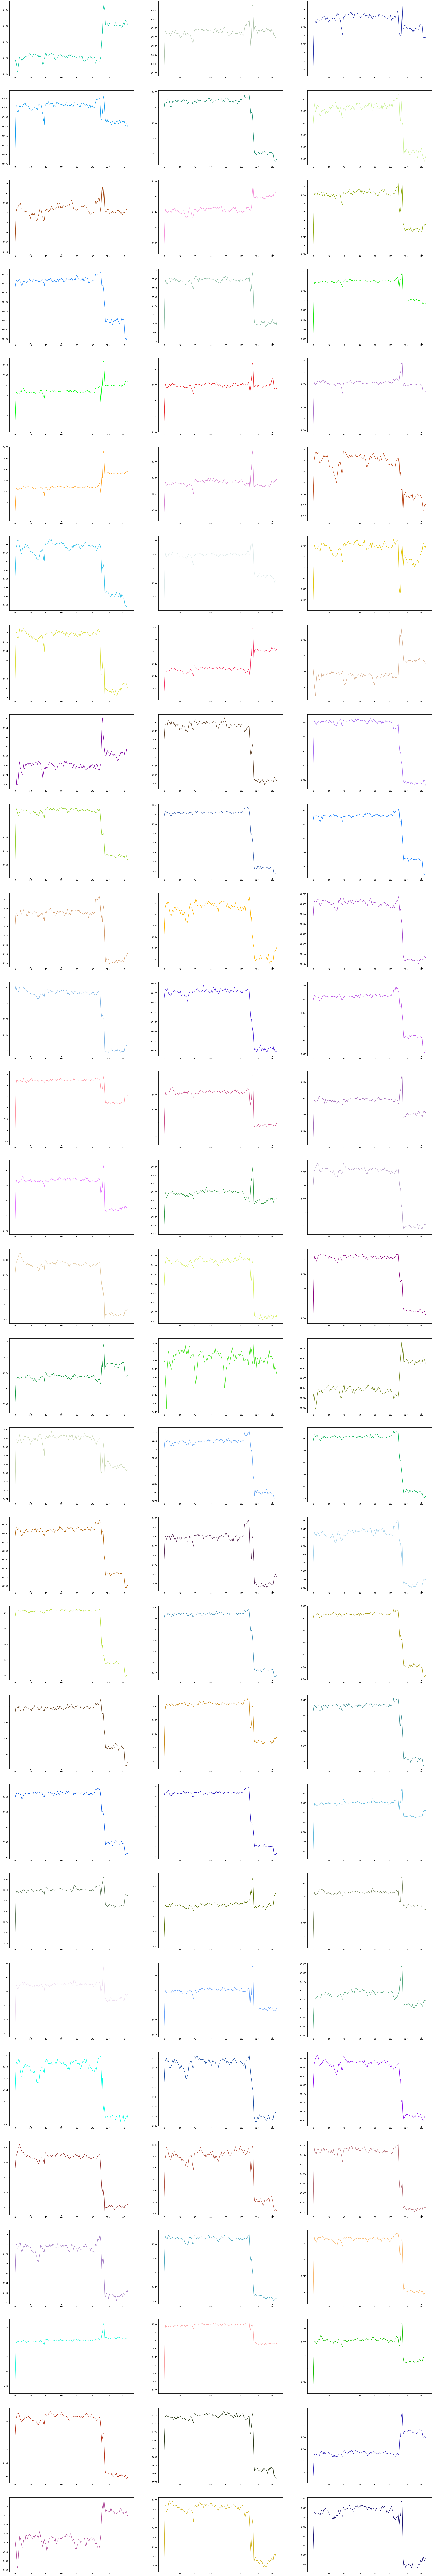

In [73]:
cols = 3
rows = 29

#x_data  = np.linspace(0,50,100)

fig, ax = plt.subplots(rows, cols, figsize=(40, 250), dpi=80)
for i in range(cols*rows):
    ax = plt.subplot(rows,cols,i+1)    
    ax.plot(np.arange(147), df_final_language_task.iloc[[i]].values[0][:-1], 
            c= [random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)])

### Math control 

In [74]:
file_list_math = []
for filename in os.listdir('./commonHCP262_172_JC_threshold_fisher_transformation_pearson_math'):
    #print(filename)
    root, ext = os.path.splitext(filename)
    if re.match('^[0-9]', root) and ext == '.xlsx':
        #print(filename)
        file_list_math.append(filename)
file_list_math

['100206_jackknife_sigConn_controlaparc35.xlsx',
 '101006_jackknife_sigConn_controlaparc35.xlsx',
 '101309_jackknife_sigConn_controlaparc35.xlsx',
 '102109_jackknife_sigConn_controlaparc35.xlsx',
 '102513_jackknife_sigConn_controlaparc35.xlsx',
 '102614_jackknife_sigConn_controlaparc35.xlsx',
 '102715_jackknife_sigConn_controlaparc35.xlsx',
 '103212_jackknife_sigConn_controlaparc35.xlsx',
 '104416_jackknife_sigConn_controlaparc35.xlsx',
 '110007_jackknife_sigConn_controlaparc35.xlsx',
 '114621_jackknife_sigConn_controlaparc35.xlsx',
 '115724_jackknife_sigConn_controlaparc35.xlsx',
 '115825_jackknife_sigConn_controlaparc35.xlsx',
 '117930_jackknife_sigConn_controlaparc35.xlsx',
 '118124_jackknife_sigConn_controlaparc35.xlsx',
 '119126_jackknife_sigConn_controlaparc35.xlsx',
 '120717_jackknife_sigConn_controlaparc35.xlsx',
 '121416_jackknife_sigConn_controlaparc35.xlsx',
 '121618_jackknife_sigConn_controlaparc35.xlsx',
 '123925_jackknife_sigConn_controlaparc35.xlsx',
 '124624_jackknife_s

In [89]:
df_all_L_R_inter = []
for m in ["LH_fc","RH_fc","inter_fc_"]:
    # df_all = pd.DataFrame()
    df_all = []
    for i in file_list_math:
        file_path = os.path.join('./commonHCP262_172_JC_threshold_fisher_transformation_pearson_math', i)
        df = pd.read_excel(file_path, m, index_col= 0)
        #df_means = df.mean(axis=1).to_list()
        arr = np.empty((df.shape[0], 147))
        arr.fill(np.NaN)
        arr[:df.shape[0], 0:df.shape[1]] = df.to_numpy()
        df_all.append(arr)
    #print(len(df_all))
    df_all = np.array(df_all)
    df_all_mean = np.nanmean(np.moveaxis(df_all, 0, -1), axis=2)
    df_all_mean_ = pd.DataFrame(df_all_mean, columns=np.arange(147))
    df_all_L_R_inter.append(df_all_mean_)
df_final_math = pd.concat(df_all_L_R_inter)

In [86]:
df_final_math.to_csv("time_series_commonHCP262_172_JC_threshold_fisher_transformation_pearson_math.csv", index=False)

In [90]:
df_final_math.reset_index(drop=True)

0         1         2         3         4         5         6    \
0   0.715787  0.717943  0.717000  0.716444  0.717074  0.716988  0.716686   
1   0.690011  0.689824  0.690254  0.690796  0.690744  0.690557  0.690722   
2   0.782679  0.782831  0.783560  0.782960  0.783558  0.783579  0.783754   
3   0.703760  0.703379  0.704565  0.705414  0.705782  0.705548  0.706183   
4   0.871660  0.871473  0.872012  0.872369  0.872223  0.872373  0.872026   
..       ...       ...       ...       ...       ...       ...       ...   
82  1.192227  1.192014  1.191772  1.192108  1.191755  1.191777  1.191396   
83  0.756018  0.756012  0.757297  0.756701  0.756575  0.756464  0.756247   
84  0.998097  0.995871  0.991977  0.991619  0.993785  0.997317  0.997565   
85  0.710242  0.709786  0.710094  0.710692  0.711563  0.710792  0.709666   
86  0.905531  0.904250  0.905607  0.905791  0.905878  0.904905  0.903894   

         7         8         9    ...       137       138       139       140  \
0   0.715900  0.715380  0.715431  ...  0.649398  0.637632  0.620496  0.638669   
1   0.690527  0.690311  0.691327  ...  0.650476  0.626967  0.649843  0.633946   
2   0.783504  0.782448  0.784287  ...  0.814347  0.813183  0.808624  0.807257   
3   0.705921  0.705084  0.706074  ...  0.729930  0.699385  0.711585  0.671259   
4   0.871145  0.871201  0.870768  ...  0.873372  0.828741  0.744523  0.717278   
..       ...       ...       ...  ...       ...       ...       ...       ...   
82  1.191598  1.190688  1.189369  ...  1.208611  1.188195  1.153332  1.118686   
83  0.756030  0.755522  0.755919  ...  0.797047  0.816145  0.823633  0.786965   
84  0.997312  0.996341  0.994568  ...  0.944529  0.916188  0.908201  0.831162   
85  0.710057  0.709676  0.709975  ...  0.750154  0.761047  0.810651  0.755911   
86  0.903797  0.903576  0.904296  ...  0.892032  0.886732  0.906720  0.887465   

         141       142       143       144       145       146  
0   0.638646  0.637403  0.637855  0.634910  0.640086  0.650474  
1   0.625489  0.626925  0.624274  0.625158  0.626549  0.731471  
2   0.807125  0.805530  0.805345  0.806924  0.806774  0.807175  
3   0.668131  0.674495  0.667754  0.668107  0.667408  0.706853  
4   0.720399  0.720846  0.720844  0.721065  0.727228  0.710787  
..       ...       ...       ...       ...       ...       ...  
82  1.115251  1.116167  1.115268  1.113832  1.120446  1.155590  
83  0.785099  0.785391  0.787125  0.788730  0.784788  0.821033  
84  0.836525  0.830232  0.832130  0.829847  0.831873  0.855023  
85  0.754031  0.751733  0.754428  0.752418  0.751674  0.792729  
86  0.890161  0.886595  0.887371  0.886519  0.884875  0.902873  

[87 rows x 147 columns]

In [91]:
df_final_math = pd.concat([rois, df_final_math], axis=1)
df_final_math

ROI1                     ROI2         0         1  \
0              lh_bankssts      lh_superiortemporal  0.715787  0.717943   
1   lh_caudalmiddlefrontal      lh_inferiorparietal  0.690011  0.689824   
2   lh_caudalmiddlefrontal  lh_rostralmiddlefrontal  0.782679  0.782831   
3   lh_caudalmiddlefrontal       lh_superiorfrontal  0.703760  0.703379   
4                lh_cuneus               lh_lingual  0.871660  0.871473   
..                     ...                      ...       ...       ...   
35     lh_superiorparietal      rh_superiorparietal  1.192227  1.192014   
36     lh_superiorparietal         rh_supramarginal  0.756018  0.756012   
37     lh_superiortemporal      rh_superiortemporal  0.998097  0.995871   
38        lh_supramarginal       rh_superiorfrontal  0.710242  0.709786   
39        lh_supramarginal         rh_supramarginal  0.905531  0.904250   

           2         3         4         5         6         7  ...       137  \
0   0.717000  0.716444  0.717074  0.716988  0.716686  0.715900  ...  0.649398   
1   0.690254  0.690796  0.690744  0.690557  0.690722  0.690527  ...  0.650476   
2   0.783560  0.782960  0.783558  0.783579  0.783754  0.783504  ...  0.814347   
3   0.704565  0.705414  0.705782  0.705548  0.706183  0.705921  ...  0.729930   
4   0.872012  0.872369  0.872223  0.872373  0.872026  0.871145  ...  0.873372   
..       ...       ...       ...       ...       ...       ...  ...       ...   
35  1.191772  1.192108  1.191755  1.191777  1.191396  1.191598  ...  1.208611   
36  0.757297  0.756701  0.756575  0.756464  0.756247  0.756030  ...  0.797047   
37  0.991977  0.991619  0.993785  0.997317  0.997565  0.997312  ...  0.944529   
38  0.710094  0.710692  0.711563  0.710792  0.709666  0.710057  ...  0.750154   
39  0.905607  0.905791  0.905878  0.904905  0.903894  0.903797  ...  0.892032   

         138       139       140       141       142       143       144  \
0   0.637632  0.620496  0.638669  0.638646  0.637403  0.637855  0.634910   
1   0.626967  0.649843  0.633946  0.625489  0.626925  0.624274  0.625158   
2   0.813183  0.808624  0.807257  0.807125  0.805530  0.805345  0.806924   
3   0.699385  0.711585  0.671259  0.668131  0.674495  0.667754  0.668107   
4   0.828741  0.744523  0.717278  0.720399  0.720846  0.720844  0.721065   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.188195  1.153332  1.118686  1.115251  1.116167  1.115268  1.113832   
36  0.816145  0.823633  0.786965  0.785099  0.785391  0.787125  0.788730   
37  0.916188  0.908201  0.831162  0.836525  0.830232  0.832130  0.829847   
38  0.761047  0.810651  0.755911  0.754031  0.751733  0.754428  0.752418   
39  0.886732  0.906720  0.887465  0.890161  0.886595  0.887371  0.886519   

         145       146  
0   0.640086  0.650474  
1   0.626549  0.731471  
2   0.806774  0.807175  
3   0.667408  0.706853  
4   0.727228  0.710787  
..       ...       ...  
35  1.120446  1.155590  
36  0.784788  0.821033  
37  0.831873  0.855023  
38  0.751674  0.792729  
39  0.884875  0.902873  

[87 rows x 149 columns]

In [92]:
# Using + operator to combine two columns
df_final_math["Functional connectivity"] = df_final_math['ROI1'].astype(str) +"-"+ df_final_math["ROI2"]
df_final_math

ROI1                     ROI2         0         1  \
0              lh_bankssts      lh_superiortemporal  0.715787  0.717943   
1   lh_caudalmiddlefrontal      lh_inferiorparietal  0.690011  0.689824   
2   lh_caudalmiddlefrontal  lh_rostralmiddlefrontal  0.782679  0.782831   
3   lh_caudalmiddlefrontal       lh_superiorfrontal  0.703760  0.703379   
4                lh_cuneus               lh_lingual  0.871660  0.871473   
..                     ...                      ...       ...       ...   
35     lh_superiorparietal      rh_superiorparietal  1.192227  1.192014   
36     lh_superiorparietal         rh_supramarginal  0.756018  0.756012   
37     lh_superiortemporal      rh_superiortemporal  0.998097  0.995871   
38        lh_supramarginal       rh_superiorfrontal  0.710242  0.709786   
39        lh_supramarginal         rh_supramarginal  0.905531  0.904250   

           2         3         4         5         6         7  ...       138  \
0   0.717000  0.716444  0.717074  0.716988  0.716686  0.715900  ...  0.637632   
1   0.690254  0.690796  0.690744  0.690557  0.690722  0.690527  ...  0.626967   
2   0.783560  0.782960  0.783558  0.783579  0.783754  0.783504  ...  0.813183   
3   0.704565  0.705414  0.705782  0.705548  0.706183  0.705921  ...  0.699385   
4   0.872012  0.872369  0.872223  0.872373  0.872026  0.871145  ...  0.828741   
..       ...       ...       ...       ...       ...       ...  ...       ...   
35  1.191772  1.192108  1.191755  1.191777  1.191396  1.191598  ...  1.188195   
36  0.757297  0.756701  0.756575  0.756464  0.756247  0.756030  ...  0.816145   
37  0.991977  0.991619  0.993785  0.997317  0.997565  0.997312  ...  0.916188   
38  0.710094  0.710692  0.711563  0.710792  0.709666  0.710057  ...  0.761047   
39  0.905607  0.905791  0.905878  0.904905  0.903894  0.903797  ...  0.886732   

         139       140       141       142       143       144       145  \
0   0.620496  0.638669  0.638646  0.637403  0.637855  0.634910  0.640086   
1   0.649843  0.633946  0.625489  0.626925  0.624274  0.625158  0.626549   
2   0.808624  0.807257  0.807125  0.805530  0.805345  0.806924  0.806774   
3   0.711585  0.671259  0.668131  0.674495  0.667754  0.668107  0.667408   
4   0.744523  0.717278  0.720399  0.720846  0.720844  0.721065  0.727228   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.153332  1.118686  1.115251  1.116167  1.115268  1.113832  1.120446   
36  0.823633  0.786965  0.785099  0.785391  0.787125  0.788730  0.784788   
37  0.908201  0.831162  0.836525  0.830232  0.832130  0.829847  0.831873   
38  0.810651  0.755911  0.754031  0.751733  0.754428  0.752418  0.751674   
39  0.906720  0.887465  0.890161  0.886595  0.887371  0.886519  0.884875   

         146                         Functional connectivity  
0   0.650474                 lh_bankssts-lh_superiortemporal  
1   0.731471      lh_caudalmiddlefrontal-lh_inferiorparietal  
2   0.807175  lh_caudalmiddlefrontal-lh_rostralmiddlefrontal  
3   0.706853       lh_caudalmiddlefrontal-lh_superiorfrontal  
4   0.710787                            lh_cuneus-lh_lingual  
..       ...                                             ...  
35  1.155590         lh_superiorparietal-rh_superiorparietal  
36  0.821033            lh_superiorparietal-rh_supramarginal  
37  0.855023         lh_superiortemporal-rh_superiortemporal  
38  0.792729             lh_supramarginal-rh_superiorfrontal  
39  0.902873               lh_supramarginal-rh_supramarginal  

[87 rows x 150 columns]

In [93]:
df_final_math.drop(["ROI1", "ROI2"], axis = 1, inplace=True)
df_final_math

0         1         2         3         4         5         6  \
0   0.715787  0.717943  0.717000  0.716444  0.717074  0.716988  0.716686   
1   0.690011  0.689824  0.690254  0.690796  0.690744  0.690557  0.690722   
2   0.782679  0.782831  0.783560  0.782960  0.783558  0.783579  0.783754   
3   0.703760  0.703379  0.704565  0.705414  0.705782  0.705548  0.706183   
4   0.871660  0.871473  0.872012  0.872369  0.872223  0.872373  0.872026   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.192227  1.192014  1.191772  1.192108  1.191755  1.191777  1.191396   
36  0.756018  0.756012  0.757297  0.756701  0.756575  0.756464  0.756247   
37  0.998097  0.995871  0.991977  0.991619  0.993785  0.997317  0.997565   
38  0.710242  0.709786  0.710094  0.710692  0.711563  0.710792  0.709666   
39  0.905531  0.904250  0.905607  0.905791  0.905878  0.904905  0.903894   

           7         8         9  ...       138       139       140       141  \
0   0.715900  0.715380  0.715431  ...  0.637632  0.620496  0.638669  0.638646   
1   0.690527  0.690311  0.691327  ...  0.626967  0.649843  0.633946  0.625489   
2   0.783504  0.782448  0.784287  ...  0.813183  0.808624  0.807257  0.807125   
3   0.705921  0.705084  0.706074  ...  0.699385  0.711585  0.671259  0.668131   
4   0.871145  0.871201  0.870768  ...  0.828741  0.744523  0.717278  0.720399   
..       ...       ...       ...  ...       ...       ...       ...       ...   
35  1.191598  1.190688  1.189369  ...  1.188195  1.153332  1.118686  1.115251   
36  0.756030  0.755522  0.755919  ...  0.816145  0.823633  0.786965  0.785099   
37  0.997312  0.996341  0.994568  ...  0.916188  0.908201  0.831162  0.836525   
38  0.710057  0.709676  0.709975  ...  0.761047  0.810651  0.755911  0.754031   
39  0.903797  0.903576  0.904296  ...  0.886732  0.906720  0.887465  0.890161   

         142       143       144       145       146  \
0   0.637403  0.637855  0.634910  0.640086  0.650474   
1   0.626925  0.624274  0.625158  0.626549  0.731471   
2   0.805530  0.805345  0.806924  0.806774  0.807175   
3   0.674495  0.667754  0.668107  0.667408  0.706853   
4   0.720846  0.720844  0.721065  0.727228  0.710787   
..       ...       ...       ...       ...       ...   
35  1.116167  1.115268  1.113832  1.120446  1.155590   
36  0.785391  0.787125  0.788730  0.784788  0.821033   
37  0.830232  0.832130  0.829847  0.831873  0.855023   
38  0.751733  0.754428  0.752418  0.751674  0.792729   
39  0.886595  0.887371  0.886519  0.884875  0.902873   

                           Functional connectivity  
0                  lh_bankssts-lh_superiortemporal  
1       lh_caudalmiddlefrontal-lh_inferiorparietal  
2   lh_caudalmiddlefrontal-lh_rostralmiddlefrontal  
3        lh_caudalmiddlefrontal-lh_superiorfrontal  
4                             lh_cuneus-lh_lingual  
..                                             ...  
35         lh_superiorparietal-rh_superiorparietal  
36            lh_superiorparietal-rh_supramarginal  
37         lh_superiortemporal-rh_superiortemporal  
38             lh_supramarginal-rh_superiorfrontal  
39               lh_supramarginal-rh_supramarginal  

[87 rows x 148 columns]

In [ ]:
df_final_math[:147]

In [94]:
len(df_final_math.iloc[[0]].values[0][:-1])

147

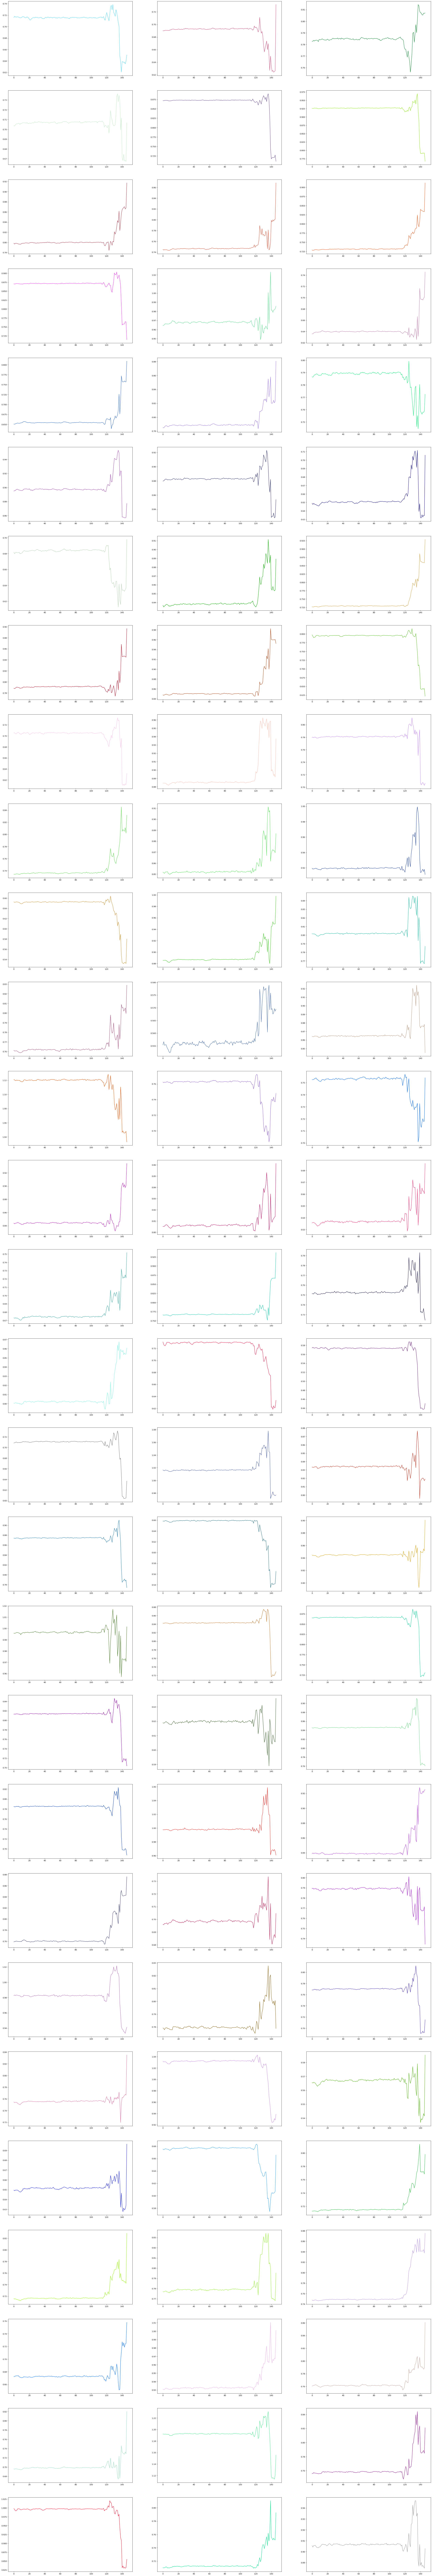

In [95]:
cols = 3
rows = 29

#x_data  = np.linspace(0,50,100)

fig, ax = plt.subplots(rows, cols, figsize=(40, 250), dpi=80)
for i in range(cols*rows):
    ax = plt.subplot(rows,cols,i+1)    
    ax.plot(np.arange(147), df_final_math.iloc[[i]].values[0][:-1], 
            c= [random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)])

### Delta 

In [ ]:
del df[df.columns[-1]]

In [97]:
del df_final_language_task[df_final_language_task.columns[-1]] 
df_final_language_task

0         1         2         3         4         5         6    \
0   0.768439  0.769604  0.767620  0.765499  0.766554  0.768983  0.770279   
1   0.747698  0.758582  0.759223  0.758460  0.758258  0.758474  0.758253   
2   0.727435  0.739782  0.739834  0.739105  0.738683  0.739536  0.739739   
3   0.688161  0.702493  0.703066  0.701474  0.701152  0.702055  0.703047   
4   0.869548  0.872095  0.872482  0.871450  0.872289  0.872641  0.872839   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.164999  1.176437  1.177320  1.177337  1.177394  1.176963  1.177128   
36  0.747180  0.757202  0.757611  0.757370  0.757305  0.758115  0.758145   
37  0.962394  0.964661  0.960574  0.958368  0.959593  0.963115  0.965439   
38  0.657422  0.670793  0.670825  0.669529  0.669703  0.670285  0.671423   
39  0.884124  0.892827  0.893219  0.892863  0.892866  0.893128  0.893225   

         7         8         9    ...       137       138       139       140  \
0   0.769924  0.769798  0.768908  ...  0.779862  0.779420  0.779739  0.781043   
1   0.758597  0.757821  0.758213  ...  0.759820  0.758802  0.759647  0.759463   
2   0.739761  0.739569  0.739276  ...  0.737937  0.738611  0.738560  0.738456   
3   0.702850  0.702615  0.702727  ...  0.699153  0.699140  0.698796  0.698717   
4   0.871901  0.870381  0.870058  ...  0.855611  0.855194  0.855498  0.855090   
..       ...       ...       ...  ...       ...       ...       ...       ...   
35  1.177022  1.176802  1.176550  ...  1.162235  1.161299  1.161941  1.161568   
36  0.757694  0.757125  0.758271  ...  0.768145  0.767513  0.767437  0.767612   
37  0.964993  0.964131  0.963024  ...  0.971522  0.971034  0.970547  0.970244   
38  0.671855  0.671230  0.671170  ...  0.659171  0.659035  0.659526  0.659222   
39  0.892819  0.892580  0.892389  ...  0.881912  0.882171  0.882998  0.882564   

         141       142       143       144       145       146  
0   0.780089  0.781124  0.781741  0.781210  0.780717  0.780205  
1   0.758998  0.757517  0.758073  0.757353  0.757468  0.757537  
2   0.738378  0.735375  0.735612  0.735477  0.735471  0.734940  
3   0.699120  0.698045  0.697691  0.698217  0.697814  0.697264  
4   0.855043  0.852929  0.852810  0.852510  0.853132  0.852949  
..       ...       ...       ...       ...       ...       ...  
35  1.161701  1.158729  1.159662  1.158651  1.158820  1.158367  
36  0.766878  0.764630  0.764975  0.765100  0.764674  0.764505  
37  0.971027  0.970837  0.970628  0.970816  0.970245  0.969604  
38  0.658988  0.660580  0.660318  0.660396  0.659358  0.659321  
39  0.882618  0.883937  0.883112  0.882798  0.883364  0.882859  

[87 rows x 147 columns]

In [98]:
del df_final_math[df_final_math.columns[-1]] 
df_final_math

0         1         2         3         4         5         6    \
0   0.715787  0.717943  0.717000  0.716444  0.717074  0.716988  0.716686   
1   0.690011  0.689824  0.690254  0.690796  0.690744  0.690557  0.690722   
2   0.782679  0.782831  0.783560  0.782960  0.783558  0.783579  0.783754   
3   0.703760  0.703379  0.704565  0.705414  0.705782  0.705548  0.706183   
4   0.871660  0.871473  0.872012  0.872369  0.872223  0.872373  0.872026   
..       ...       ...       ...       ...       ...       ...       ...   
35  1.192227  1.192014  1.191772  1.192108  1.191755  1.191777  1.191396   
36  0.756018  0.756012  0.757297  0.756701  0.756575  0.756464  0.756247   
37  0.998097  0.995871  0.991977  0.991619  0.993785  0.997317  0.997565   
38  0.710242  0.709786  0.710094  0.710692  0.711563  0.710792  0.709666   
39  0.905531  0.904250  0.905607  0.905791  0.905878  0.904905  0.903894   

         7         8         9    ...       137       138       139       140  \
0   0.715900  0.715380  0.715431  ...  0.649398  0.637632  0.620496  0.638669   
1   0.690527  0.690311  0.691327  ...  0.650476  0.626967  0.649843  0.633946   
2   0.783504  0.782448  0.784287  ...  0.814347  0.813183  0.808624  0.807257   
3   0.705921  0.705084  0.706074  ...  0.729930  0.699385  0.711585  0.671259   
4   0.871145  0.871201  0.870768  ...  0.873372  0.828741  0.744523  0.717278   
..       ...       ...       ...  ...       ...       ...       ...       ...   
35  1.191598  1.190688  1.189369  ...  1.208611  1.188195  1.153332  1.118686   
36  0.756030  0.755522  0.755919  ...  0.797047  0.816145  0.823633  0.786965   
37  0.997312  0.996341  0.994568  ...  0.944529  0.916188  0.908201  0.831162   
38  0.710057  0.709676  0.709975  ...  0.750154  0.761047  0.810651  0.755911   
39  0.903797  0.903576  0.904296  ...  0.892032  0.886732  0.906720  0.887465   

         141       142       143       144       145       146  
0   0.638646  0.637403  0.637855  0.634910  0.640086  0.650474  
1   0.625489  0.626925  0.624274  0.625158  0.626549  0.731471  
2   0.807125  0.805530  0.805345  0.806924  0.806774  0.807175  
3   0.668131  0.674495  0.667754  0.668107  0.667408  0.706853  
4   0.720399  0.720846  0.720844  0.721065  0.727228  0.710787  
..       ...       ...       ...       ...       ...       ...  
35  1.115251  1.116167  1.115268  1.113832  1.120446  1.155590  
36  0.785099  0.785391  0.787125  0.788730  0.784788  0.821033  
37  0.836525  0.830232  0.832130  0.829847  0.831873  0.855023  
38  0.754031  0.751733  0.754428  0.752418  0.751674  0.792729  
39  0.890161  0.886595  0.887371  0.886519  0.884875  0.902873  

[87 rows x 147 columns]

In [99]:
df_delta = df_final_language_task[:] - df_final_math[:]
df_delta

0         1         2         3         4         5         6    \
0   0.052652  0.051662  0.050620  0.049055  0.049480  0.051995  0.053593   
1   0.057686  0.068757  0.068969  0.067664  0.067514  0.067916  0.067531   
2  -0.055243 -0.043049 -0.043726 -0.043855 -0.044875 -0.044044 -0.044015   
3  -0.015599 -0.000886 -0.001500 -0.003940 -0.004629 -0.003494 -0.003136   
4  -0.002112  0.000621  0.000470 -0.000919  0.000066  0.000269  0.000813   
..       ...       ...       ...       ...       ...       ...       ...   
35 -0.027228 -0.015577 -0.014452 -0.014770 -0.014361 -0.014814 -0.014268   
36 -0.008838  0.001190  0.000314  0.000669  0.000730  0.001651  0.001898   
37 -0.035703 -0.031210 -0.031403 -0.033251 -0.034192 -0.034202 -0.032126   
38 -0.052820 -0.038993 -0.039269 -0.041162 -0.041860 -0.040507 -0.038243   
39 -0.021408 -0.011423 -0.012389 -0.012928 -0.013012 -0.011777 -0.010669   

         7         8         9    ...       137       138       139       140  \
0   0.054024  0.054418  0.053477  ...  0.130464  0.141788  0.159244  0.142374   
1   0.068070  0.067510  0.066886  ...  0.109344  0.131835  0.109804  0.125517   
2  -0.043743 -0.042879 -0.045011  ... -0.076410 -0.074573 -0.070064 -0.068801   
3  -0.003071 -0.002469 -0.003347  ... -0.030778 -0.000245 -0.012789  0.027458   
4   0.000756 -0.000821 -0.000710  ... -0.017761  0.026453  0.110975  0.137812   
..       ...       ...       ...  ...       ...       ...       ...       ...   
35 -0.014576 -0.013886 -0.012818  ... -0.046376 -0.026896  0.008609  0.042881   
36  0.001664  0.001603  0.002352  ... -0.028903 -0.048632 -0.056196 -0.019353   
37 -0.032319 -0.032210 -0.031544  ...  0.026993  0.054845  0.062346  0.139082   
38 -0.038202 -0.038446 -0.038804  ... -0.090983 -0.102012 -0.151125 -0.096689   
39 -0.010978 -0.010996 -0.011907  ... -0.010121 -0.004561 -0.023723 -0.004900   

         141       142       143       144       145       146  
0   0.141444  0.143720  0.143886  0.146299  0.140631  0.129731  
1   0.133509  0.130592  0.133799  0.132195  0.130920  0.026065  
2  -0.068747 -0.070155 -0.069732 -0.071448 -0.071303 -0.072235  
3   0.030989  0.023549  0.029937  0.030111  0.030405 -0.009590  
4   0.134645  0.132083  0.131966  0.131445  0.125904  0.142163  
..       ...       ...       ...       ...       ...       ...  
35  0.046450  0.042562  0.044394  0.044820  0.038374  0.002777  
36 -0.018220 -0.020761 -0.022149 -0.023630 -0.020115 -0.056528  
37  0.134502  0.140605  0.138497  0.140969  0.138372  0.114581  
38 -0.095043 -0.091153 -0.094110 -0.092022 -0.092317 -0.133409  
39 -0.007543 -0.002659 -0.004259 -0.003722 -0.001511 -0.020014  

[87 rows x 147 columns]

In [100]:
df_final_delta = pd.concat([rois, df_delta], axis=1)
df_final_delta
df_final_delta["Functional connectivity"] = df_final_delta['ROI1'].astype(str) +"-"+ df_final_delta["ROI2"]
df_final_delta

ROI1                     ROI2         0         1  \
0              lh_bankssts      lh_superiortemporal  0.052652  0.051662   
1   lh_caudalmiddlefrontal      lh_inferiorparietal  0.057686  0.068757   
2   lh_caudalmiddlefrontal  lh_rostralmiddlefrontal -0.055243 -0.043049   
3   lh_caudalmiddlefrontal       lh_superiorfrontal -0.015599 -0.000886   
4                lh_cuneus               lh_lingual -0.002112  0.000621   
..                     ...                      ...       ...       ...   
35     lh_superiorparietal      rh_superiorparietal -0.027228 -0.015577   
36     lh_superiorparietal         rh_supramarginal -0.008838  0.001190   
37     lh_superiortemporal      rh_superiortemporal -0.035703 -0.031210   
38        lh_supramarginal       rh_superiorfrontal -0.052820 -0.038993   
39        lh_supramarginal         rh_supramarginal -0.021408 -0.011423   

           2         3         4         5         6         7  ...       138  \
0   0.050620  0.049055  0.049480  0.051995  0.053593  0.054024  ...  0.141788   
1   0.068969  0.067664  0.067514  0.067916  0.067531  0.068070  ...  0.131835   
2  -0.043726 -0.043855 -0.044875 -0.044044 -0.044015 -0.043743  ... -0.074573   
3  -0.001500 -0.003940 -0.004629 -0.003494 -0.003136 -0.003071  ... -0.000245   
4   0.000470 -0.000919  0.000066  0.000269  0.000813  0.000756  ...  0.026453   
..       ...       ...       ...       ...       ...       ...  ...       ...   
35 -0.014452 -0.014770 -0.014361 -0.014814 -0.014268 -0.014576  ... -0.026896   
36  0.000314  0.000669  0.000730  0.001651  0.001898  0.001664  ... -0.048632   
37 -0.031403 -0.033251 -0.034192 -0.034202 -0.032126 -0.032319  ...  0.054845   
38 -0.039269 -0.041162 -0.041860 -0.040507 -0.038243 -0.038202  ... -0.102012   
39 -0.012389 -0.012928 -0.013012 -0.011777 -0.010669 -0.010978  ... -0.004561   

         139       140       141       142       143       144       145  \
0   0.159244  0.142374  0.141444  0.143720  0.143886  0.146299  0.140631   
1   0.109804  0.125517  0.133509  0.130592  0.133799  0.132195  0.130920   
2  -0.070064 -0.068801 -0.068747 -0.070155 -0.069732 -0.071448 -0.071303   
3  -0.012789  0.027458  0.030989  0.023549  0.029937  0.030111  0.030405   
4   0.110975  0.137812  0.134645  0.132083  0.131966  0.131445  0.125904   
..       ...       ...       ...       ...       ...       ...       ...   
35  0.008609  0.042881  0.046450  0.042562  0.044394  0.044820  0.038374   
36 -0.056196 -0.019353 -0.018220 -0.020761 -0.022149 -0.023630 -0.020115   
37  0.062346  0.139082  0.134502  0.140605  0.138497  0.140969  0.138372   
38 -0.151125 -0.096689 -0.095043 -0.091153 -0.094110 -0.092022 -0.092317   
39 -0.023723 -0.004900 -0.007543 -0.002659 -0.004259 -0.003722 -0.001511   

         146                         Functional connectivity  
0   0.129731                 lh_bankssts-lh_superiortemporal  
1   0.026065      lh_caudalmiddlefrontal-lh_inferiorparietal  
2  -0.072235  lh_caudalmiddlefrontal-lh_rostralmiddlefrontal  
3  -0.009590       lh_caudalmiddlefrontal-lh_superiorfrontal  
4   0.142163                            lh_cuneus-lh_lingual  
..       ...                                             ...  
35  0.002777         lh_superiorparietal-rh_superiorparietal  
36 -0.056528            lh_superiorparietal-rh_supramarginal  
37  0.114581         lh_superiortemporal-rh_superiortemporal  
38 -0.133409             lh_supramarginal-rh_superiorfrontal  
39 -0.020014               lh_supramarginal-rh_supramarginal  

[87 rows x 150 columns]

In [101]:
df_final_delta.drop(["ROI1", "ROI2"], axis = 1, inplace=True)
df_final_delta

0         1         2         3         4         5         6  \
0   0.052652  0.051662  0.050620  0.049055  0.049480  0.051995  0.053593   
1   0.057686  0.068757  0.068969  0.067664  0.067514  0.067916  0.067531   
2  -0.055243 -0.043049 -0.043726 -0.043855 -0.044875 -0.044044 -0.044015   
3  -0.015599 -0.000886 -0.001500 -0.003940 -0.004629 -0.003494 -0.003136   
4  -0.002112  0.000621  0.000470 -0.000919  0.000066  0.000269  0.000813   
..       ...       ...       ...       ...       ...       ...       ...   
35 -0.027228 -0.015577 -0.014452 -0.014770 -0.014361 -0.014814 -0.014268   
36 -0.008838  0.001190  0.000314  0.000669  0.000730  0.001651  0.001898   
37 -0.035703 -0.031210 -0.031403 -0.033251 -0.034192 -0.034202 -0.032126   
38 -0.052820 -0.038993 -0.039269 -0.041162 -0.041860 -0.040507 -0.038243   
39 -0.021408 -0.011423 -0.012389 -0.012928 -0.013012 -0.011777 -0.010669   

           7         8         9  ...       138       139       140       141  \
0   0.054024  0.054418  0.053477  ...  0.141788  0.159244  0.142374  0.141444   
1   0.068070  0.067510  0.066886  ...  0.131835  0.109804  0.125517  0.133509   
2  -0.043743 -0.042879 -0.045011  ... -0.074573 -0.070064 -0.068801 -0.068747   
3  -0.003071 -0.002469 -0.003347  ... -0.000245 -0.012789  0.027458  0.030989   
4   0.000756 -0.000821 -0.000710  ...  0.026453  0.110975  0.137812  0.134645   
..       ...       ...       ...  ...       ...       ...       ...       ...   
35 -0.014576 -0.013886 -0.012818  ... -0.026896  0.008609  0.042881  0.046450   
36  0.001664  0.001603  0.002352  ... -0.048632 -0.056196 -0.019353 -0.018220   
37 -0.032319 -0.032210 -0.031544  ...  0.054845  0.062346  0.139082  0.134502   
38 -0.038202 -0.038446 -0.038804  ... -0.102012 -0.151125 -0.096689 -0.095043   
39 -0.010978 -0.010996 -0.011907  ... -0.004561 -0.023723 -0.004900 -0.007543   

         142       143       144       145       146  \
0   0.143720  0.143886  0.146299  0.140631  0.129731   
1   0.130592  0.133799  0.132195  0.130920  0.026065   
2  -0.070155 -0.069732 -0.071448 -0.071303 -0.072235   
3   0.023549  0.029937  0.030111  0.030405 -0.009590   
4   0.132083  0.131966  0.131445  0.125904  0.142163   
..       ...       ...       ...       ...       ...   
35  0.042562  0.044394  0.044820  0.038374  0.002777   
36 -0.020761 -0.022149 -0.023630 -0.020115 -0.056528   
37  0.140605  0.138497  0.140969  0.138372  0.114581   
38 -0.091153 -0.094110 -0.092022 -0.092317 -0.133409   
39 -0.002659 -0.004259 -0.003722 -0.001511 -0.020014   

                           Functional connectivity  
0                  lh_bankssts-lh_superiortemporal  
1       lh_caudalmiddlefrontal-lh_inferiorparietal  
2   lh_caudalmiddlefrontal-lh_rostralmiddlefrontal  
3        lh_caudalmiddlefrontal-lh_superiorfrontal  
4                             lh_cuneus-lh_lingual  
..                                             ...  
35         lh_superiorparietal-rh_superiorparietal  
36            lh_superiorparietal-rh_supramarginal  
37         lh_superiortemporal-rh_superiortemporal  
38             lh_supramarginal-rh_superiorfrontal  
39               lh_supramarginal-rh_supramarginal  

[87 rows x 148 columns]

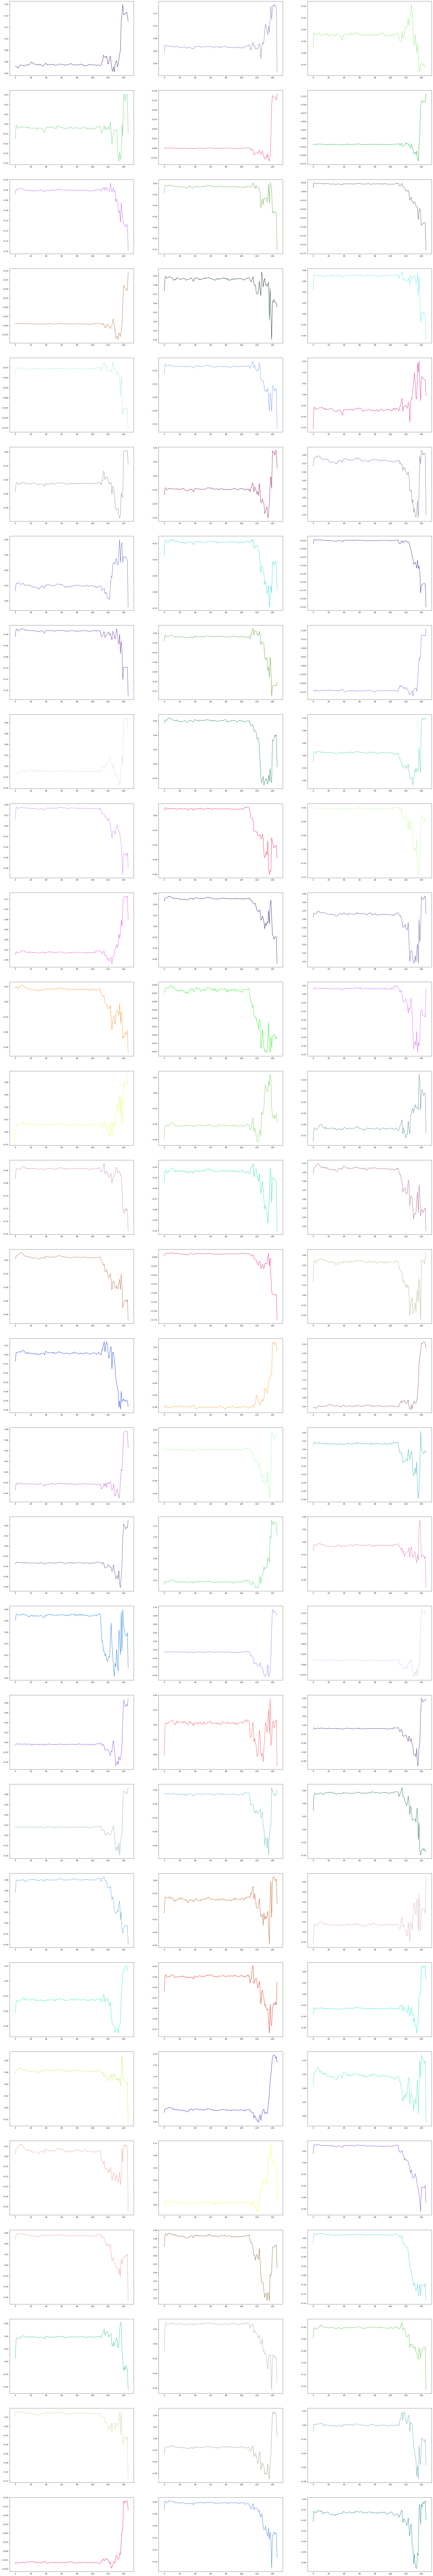

In [102]:
cols = 3
rows = 29

#x_data  = np.linspace(0,50,100)

fig, ax = plt.subplots(rows, cols, figsize=(40, 250), dpi=80)
for i in range(cols*rows):
    ax = plt.subplot(rows,cols,i+1)    
    ax.plot(np.arange(147), df_final_delta.iloc[[i]].values[0][:-1], 
            c= [random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)])